In [1]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carga los datos
credit_scoring = pd.read_csv('/datasets/credit_scoring_eng.csv')



## Ejercicio 1. Exploración de datos

**Descripción de los datos**
- `children` - el número de hijos en la familia
- `days_employed` - experiencia laboral en días
- `dob_years` - la edad del cliente en años
- `education` - la educación del cliente
- `education_id` - identificador de educación
- `family_status` - estado civil
- `family_status_id` - identificador de estado civil
- `gender` - género del cliente
- `income_type` - tipo de empleo
- `debt` - ¿había alguna deuda en el pago de un préstamo?
- `total_income` - ingreso mensual
- `purpose` - el propósito de obtener un préstamo

[Ahora vamos a explorar nuestros datos. Querrás ver cuántas columnas y filas hay, observa algunas filas para identificar posibles problemas con los datos.]

In [2]:
# Vamos a ver cuántas filas y columnas tiene nuestro conjunto de datos
filas, columnas = credit_scoring.shape
print("Número de filas:", filas)
print("Número de columnas:", columnas)


Número de filas: 21525
Número de columnas: 12


In [3]:
# vamos a mostrar las primeras filas N
credit_scoring.head(10)


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


La tabla tiene un total de 21,525 entradas (filas).
Hay 12 columnas en total, cada una con un nombre y un recuento de valores no nulos.
Los tipos de datos de las columnas son: float64 (2 columnas), int64 (5 columnas) y object (5 columnas).
Algunas columnas tienen valores nulos, como days_employed y total_income. Estas columnas tienen un recuento no nulo de 19,351, lo que significa que faltan algunos valores en esas columnas.
En days_employed hay numeros negativos, necesito revisar eso.


In [4]:
# Obtener información sobre los datos
credit_scoring.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Hay valores ausentes en days_employed y total_income

In [5]:
# Veamos la tabla filtrada con valores ausentes de la primera columna donde faltan datos
columna_faltante = 'days_employed'  # Nombre de la primera columna que tiene valores ausentes
tabla_filtrada = credit_scoring[credit_scoring[columna_faltante].isnull()]
tabla_filtrada



,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


Puedo observar que en donde hay valores ausentes de la columna days_employed, la mayoria de educacion es secundaria, y no presentan total income, asi que a primera vista se ve que el valor ausente es por que no cuenta con empleo.

In [6]:
# Apliquemos múltiples condiciones para filtrar datos y veamos el número de filas en la tabla filtrada.
columna_faltante2 = 'total_income'  # Nombre de la segunda columna que tiene valores ausentes
tabla_filtrada2 = credit_scoring[credit_scoring[columna_faltante].isnull()]
tabla_filtrada2
filas2, columnas2 = tabla_filtrada.shape
print("Número de filas en tabla filtrada 1:", filas2)
print("Número de columnas en tabla filtrada 1:", columnas2)
filas3, columnas3 = tabla_filtrada2.shape
print("Número de filas en tabla filtrada 2:", filas3)
print("Número de columnas en tabla filtrada 2:", columnas3)
num_valores_ausentes = credit_scoring.isnull().sum()
print()
print(num_valores_ausentes)




Número de filas en tabla filtrada 1: 2174
Número de columnas en tabla filtrada 1: 12
Número de filas en tabla filtrada 2: 2174
Número de columnas en tabla filtrada 2: 12

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64



Saque el porcentaje de valores ausentes en el siguiente codigo

In [7]:
total_filas = credit_scoring.shape[0]  # Número total de filas en el DataFrame
total_valores_ausentes = num_valores_ausentes.sum()  # Suma total de valores ausentes en todas las columnas

porcentaje_valores_ausentes = (total_valores_ausentes / total_filas) * 100
print("Porcentaje de valores ausentes:", porcentaje_valores_ausentes, "%")


Porcentaje de valores ausentes: 20.199767711962835 %


In [8]:
# Vamos a investigar a los clientes que no tienen datos sobre la característica identificada y la columna con los valores ausentes
#filtrando la lista para solo crear un nuevo dataframe donde que contenga solo las filas donde tanto la columna days_employed como la columna total_income tengan valores ausentes.
clientes_sin_datos = credit_scoring[credit_scoring['days_employed'].isnull() & credit_scoring['total_income'].isnull()]
clientes_sin_datos


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


In [9]:
# Comprobación de la distribución
print(clientes_sin_datos['education'].value_counts())
print()
print(clientes_sin_datos['income_type'].value_counts())
print()
print(clientes_sin_datos['family_status'].value_counts())


secondary education    1408
bachelor's degree       496
SECONDARY EDUCATION      67
Secondary Education      65
some college             55
Bachelor's Degree        25
BACHELOR'S DEGREE        23
primary education        19
SOME COLLEGE              7
Some College              7
Primary Education         1
PRIMARY EDUCATION         1
Name: education, dtype: int64

employee         1105
business          508
retiree           413
civil servant     147
entrepreneur        1
Name: income_type, dtype: int64

married              1237
civil partnership     442
unmarried             288
divorced              112
widow / widower        95
Name: family_status, dtype: int64



La mayoria de valores ausentes cuentan con la secondary education.
En la columna education, hay varias categorías que representan diferentes niveles de educación. Sin embargo, existen variaciones en la forma en que se registran las categorías, como diferencias en la capitalización o el uso de abreviaturas. Esto sugiere que puede haber inconsistencias en la forma en que se ingresaron los datos. Sería recomendable realizar una limpieza y estandarización de las categorías de educación para evitar duplicados y errores en el análisis.
Teniendo en cuenta estos resultados, es difícil determinar la razón exacta por la cual los valores están ausentes en las columnas days_employed y total_income sin más información. Sin embargo, hay posibles explicaciones y escenarios que podrían estar asociados con los valores ausentes.


In [10]:
# Comprobando la distribución en el conjunto de datos entero
columnas_categoricas = ['education', 'income_type', 'family_status']

for columna in columnas_categoricas:
    print("Distribución de valores en la columna:", columna)
    print(credit_scoring[columna].value_counts())
    print()




Distribución de valores en la columna: education
secondary education    13750
bachelor's degree       4718
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        274
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
Graduate Degree            1
GRADUATE DEGREE            1
Name: education, dtype: int64

Distribución de valores en la columna: income_type
employee                       11119
business                        5085
retiree                         3856
civil servant                   1459
unemployed                         2
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64

Distribución de valores en la columna: family_status
married              12380
civil partnership     417

En general, la distribución en el conjunto de datos original es bastante similar a la distribución en la tabla filtrada, lo que indica que los valores ausentes en la tabla filtrada no parecen seguir un patrón específico relacionado con las características de los clientes, como la educación, el tipo de ingreso o el estado civil. Sin embargo, es importante tener en cuenta las diferencias en las categorías adicionales presentes en el conjunto de datos original, como "entrepreneur", "unemployed" y "student", que no están presentes en la tabla filtrada y podrían estar relacionadas con los valores ausentes



Verificar si los valores ausentes están relacionados con una columna específica: Examina si los valores ausentes en las columnas days_employed y total_income están relacionados con una columna específica en el conjunto de datos. Puedes verificar esto mediante la comparación de la distribución de los valores ausentes con la distribución de otra columna. Por ejemplo, puedes comparar la distribución de los valores ausentes con la distribución de la columna gender o la columna purpose para identificar posibles correlaciones.

In [12]:
# Comprobación de otros patrones: explica cuáles

tabla_contingencia = pd.crosstab(index=credit_scoring['gender'].isnull(), columns=[credit_scoring['days_employed'].isnull(), credit_scoring['total_income'].isnull()])
print(tabla_contingencia)


days_employed  False True 
total_income   False True 
gender                    
False          19351  2174



En la columna gender, todos los registros tienen valores presentes (False) y no hay valores ausentes (True).

En la columna days_employed, hay 19,351 registros con valores presentes (False) y 2,174 registros con valores ausentes (True).

En la columna total_income, también hay 19,351 registros con valores presentes (False) y 2,174 registros con valores ausentes (True).

Estos resultados indican que no hay una relación directa entre los valores ausentes en las columnas days_employed y total_income y la columna gender. Es decir, la falta de datos en las columnas days_employed y total_income no parece depender del género de los clientes.

## Transformación de datos


In [13]:
# Veamos todos los valores en la columna de educación para verificar si será necesario corregir la ortografía y qué habrá que corregir exactamente
valores_educacion = credit_scoring['education'].unique()
print(valores_educacion)


["bachelor's degree" 'secondary education' 'Secondary Education'
 'SECONDARY EDUCATION' "BACHELOR'S DEGREE" 'some college'
 'primary education' "Bachelor's Degree" 'SOME COLLEGE' 'Some College'
 'PRIMARY EDUCATION' 'Primary Education' 'Graduate Degree'
 'GRADUATE DEGREE' 'graduate degree']


In [14]:
# Arregla los registros si es necesario
correcciones_educacion = {
    "secondary education": "Secondary Education",
    "SECONDARY EDUCATION": "Secondary Education",
    "bachelor's degree": "Bachelor's Degree",
    "BACHELOR'S DEGREE": "Bachelor's Degree",
    "some college": "Some College",
    "primary education": "Primary Education",
    "SOME COLLEGE": "Some College",
    "PRIMARY EDUCATION": "Primary Education",
    "Graduate Degree": "Graduate Degree",
    "GRADUATE DEGREE": "Graduate Degree",
}

credit_scoring['education'] = credit_scoring['education'].replace(correcciones_educacion)


In [15]:
# Comprobar todos los valores en la columna para asegurarnos de que los hayamos corregido
print(credit_scoring['education'].unique())


["Bachelor's Degree" 'Secondary Education' 'Some College'
 'Primary Education' 'Graduate Degree' 'graduate degree']


[Comprueba los datos de la columna `children`]

In [16]:
# Veamos la distribución de los valores en la columna `children`
distribucion_children = credit_scoring['children'].value_counts()
print(distribucion_children)


 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64



Hay valores negativos ("-1") y un valor de "20" en la columna "children". Estos valores parecen ser atípicos y pueden ser el resultado de errores o problemas en los datos.

La frecuencia de los valores negativos y el valor de "20" es relativamente baja en comparación con los valores más comunes de "0", "1" y "2". Sin embargo, aún representan un porcentaje significativo de los datos problemáticos en esta columna.

In [17]:
datos_problematicos = credit_scoring[(credit_scoring['children'] == -1) | (credit_scoring['children'] == 20)]
datos_problematicos
tabla_relacion_family_children = datos_problematicos.groupby(['family_status', 'children']).size().reset_index(name='count')

print(tabla_relacion_family_children)# Podemos observar que hubo un erorr al ingresar los datos, remplazare los -1 y los 20 a 0[arregla los datos según tu decisión]


#Remplazare los datos incorrectos con 0
# Reemplazar los datos incorrectos (-1 y 20) en la columna "children" con 0
credit_scoring['children'] = credit_scoring['children'].replace([-1, 20], 0)


       family_status  children  count
0  civil partnership        -1      5
1  civil partnership        20     12
2           divorced        -1      4
3           divorced        20      2
4            married        -1     29
5            married        20     49
6          unmarried        -1      5
7          unmarried        20      9
8    widow / widower        -1      4
9    widow / widower        20      4


In [18]:
# Comprobar la columna `children` de nuevo para asegurarnos de que todo está arreglado
distribucion_children = credit_scoring['children'].value_counts()
print(distribucion_children)


0    14272
1     4818
2     2055
3      330
4       41
5        9
Name: children, dtype: int64


In [19]:
# Encuentra datos problemáticos en `days_employed`, si existen, y calcula el porcentaje

datos_problematicos_days_employed = credit_scoring[credit_scoring['days_employed'] < 0]

# Calcular el porcentaje de datos problemáticos
porcentaje_datos_problematicos = len(datos_problematicos_days_employed) / len(credit_scoring) * 100

print("Porcentaje de datos problemáticos en 'days_employed': {:.2f}%".format(porcentaje_datos_problematicos))
print()
datos_problematicos_days_employed



Porcentaje de datos problemáticos en 'days_employed': 73.90%



,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,Bachelor's Degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,Secondary Education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,Secondary Education,1,married,0,M,employee,0,42820.568,supplementary education
5,0,-926.185831,27,Bachelor's Degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
...,...,...,...,...,...,...,...,...,...,...,...,...
21519,1,-2351.431934,37,graduate degree,4,divorced,3,M,employee,0,18551.846,buy commercial real estate
21520,1,-4529.316663,43,Secondary Education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21522,1,-2113.346888,38,Secondary Education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,-3112.481705,38,Secondary Education,1,married,0,M,employee,1,39054.888,buying my own car


Considero que los dias de trabajo se typearon mal por que hay 75% de datos incorrectos, asi que yo creo que se les paso el - en sus respuestas, procedere a quitarles eel signo - a los datos

In [20]:
# Convertir los valores negativos a positivos en la columna "days_employed"
credit_scoring['days_employed'] = credit_scoring['days_employed'].abs()



In [21]:
# Comprueba el resultado - asegúrate de que esté arreglado
datos_problematicos_days_employed = credit_scoring[credit_scoring['days_employed'] < 0]

datos_problematicos_days_employed

# Establecer el umbral para considerar valores exageradamente grandes en days_employed
umbral_exagerado_days_employed = 100000

# Contar cuántos valores exageradamente grandes hay en la columna 'days_employed'
valores_exagerados_days_employed = credit_scoring[credit_scoring['days_employed'] > umbral_exagerado_days_employed].shape[0]

print(f"El número de valores exageradamente grandes en la columna 'days_employed' es: {valores_exagerados_days_employed}")

#Analizaremos cual es la media y la mediana 
# Calcular la media de 'days_employed' excluyendo los valores exageradamente grandes
#media_days_employed = credit_scoring[credit_scoring['days_employed'] <= umbral_exagerado_days_employed]['days_employed'].mean()

# Calcular la mediana de 'days_employed' excluyendo los valores exageradamente grandes
#mediana_days_employed = credit_scoring[credit_scoring['days_employed'] <= umbral_exagerado_days_employed]['days_employed'].median()

#print(f"Media de 'days_employed': {media_days_employed}")
#print(f"Mediana de 'days_employed': {mediana_days_employed}")
# Reemplazar los valores exageradamente grandes en 'days_employed' con valores nulos
credit_scoring.loc[credit_scoring['days_employed'] > umbral_exagerado_days_employed, 'days_employed'] = np.nan

print(f"El número de valores exageradamente grandes en la columna 'days_employed' es: {valores_exagerados_days_employed}")

#Exito, tabla vacia

El número de valores exageradamente grandes en la columna 'days_employed' es: 3445
El número de valores exageradamente grandes en la columna 'days_employed' es: 3445


<div class="alert alert-block alert-info">
<b>Procedo a corregir mi codigo para no solo abarcar numeros negativos, si no numeros excesivamente grandes.</b> <a class="tocSkip"></a>
</div>


<div class="alert alert-block alert-info">
<b>Procedo a corregir mi codigo para no solo abarcar numeros negativos, si no numeros excesivamente grandes remplazadonlos por valores nulos como tu me recomendaste. #Uso numpy</b> <a class="tocSkip"></a>
</div>


Ahora echemos un vistazo a la edad de clientes para ver si hay algún problema allí. Una vez más, piensa qué datos pueden ser extraños en esta columna, es decir, qué dato no puede ser la edad de alguien.

In [22]:
# Revisa `dob_years` en busca de valores sospechosos y cuenta el porcentaje
# Filtrar valores sospechosos en la columna "dob_years" (edades negativas o igual a cero)
datos_sospechosos_dob_years = credit_scoring[(credit_scoring['dob_years'] <= 0)]

# Calcular el porcentaje de valores sospechosos
porcentaje_datos_sospechosos = len(datos_sospechosos_dob_years) / len(credit_scoring) * 100

print("Porcentaje de valores sospechosos en 'dob_years': {:.2f}%".format(porcentaje_datos_sospechosos))


print() 
# Obtener valores únicos de las edades sospechosas
valores_sospechosos_dob_years = datos_sospechosos_dob_years['dob_years'].unique()

# Crear una tabla con los valores sospechosos de "dob_years"
tabla_valores_sospechosos = pd.DataFrame({'Edades Sospechosas': valores_sospechosos_dob_years})

tabla_valores_sospechosos

print()
datos_sospechosos_dob_years

Porcentaje de valores sospechosos en 'dob_years': 0.47%




,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
99,0,NaN,0,Secondary Education,1,married,0,F,retiree,0,11406.644,car
149,0,2664.273168,0,Secondary Education,1,divorced,3,F,employee,0,11228.230,housing transactions
270,3,1872.663186,0,Secondary Education,1,married,0,F,employee,0,16346.633,housing renovation
578,0,NaN,0,Secondary Education,1,married,0,F,retiree,0,15619.310,construction of own property
1040,0,1158.029561,0,Bachelor's Degree,0,divorced,3,F,business,0,48639.062,to own a car
...,...,...,...,...,...,...,...,...,...,...,...,...
19829,0,NaN,0,Secondary Education,1,married,0,F,employee,0,NaN,housing
20462,0,NaN,0,Secondary Education,1,married,0,F,retiree,0,41471.027,purchase of my own house
20577,0,NaN,0,Secondary Education,1,unmarried,4,F,retiree,0,20766.202,property
21179,2,108.967042,0,Bachelor's Degree,0,married,0,M,business,0,38512.321,building a real estate


Remplazare las edades 0 con la media de de los datos

In [23]:
# Resuelve los problemas en la columna `dob_years`, si existen
edad_media = credit_scoring[credit_scoring['dob_years'] > 0]['dob_years'].mean()
#Remplazando
credit_scoring.loc[credit_scoring['dob_years'] == 0, 'dob_years'] = edad_media

In [24]:
# Comprueba el resultado - asegúrate de que esté arreglado
datos_sospechosos_dob_years = credit_scoring[(credit_scoring['dob_years'] <= 0)]
datos_sospechosos_dob_years

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


In [25]:
# Veamos los valores de la columna
frecuencia_family_status = credit_scoring['family_status'].value_counts()

frecuencia_family_status

#No hay valores atipicos.


married              12380
civil partnership     4177
unmarried             2813
divorced              1195
widow / widower        960
Name: family_status, dtype: int64

In [28]:
# Veamos los valores en la columna
frecuencia_gender = credit_scoring['gender'].value_counts()

frecuencia_gender

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

In [29]:
# Aborda los valores problemáticos, si existen
#solo hay un valor atipico de xna, procedere a ver la fila, y analizar 
fila_xna = credit_scoring.loc[credit_scoring['gender'] == 'XNA']

fila_xna


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,2358.600502,24.0,Some College,2,civil partnership,1,XNA,business,0,32624.825,buy real estate


In [30]:
# Comprueba el resultado - asegúrate de que esté arreglado
#La eliminare por que es solo 1 
credit_scoring = credit_scoring.drop(credit_scoring[credit_scoring['gender'] == 'XNA'].index)

frecuencia_gender = credit_scoring['gender'].value_counts()

frecuencia_gender



F    14236
M     7288
Name: gender, dtype: int64

In [31]:
# Veamos los valores en la columna
frecuencia_income_type = credit_scoring['income_type'].value_counts()

frecuencia_income_type


employee                       11119
business                        5084
retiree                         3856
civil servant                   1459
unemployed                         2
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64

In [34]:
# Comprobar los duplicados
hay_duplicados = credit_scoring.duplicated()


cantidad_duplicados = hay_duplicados.sum()

print("Cantidad de filas duplicadas: ", cantidad_duplicados)
print()
filas_duplicadas = credit_scoring[hay_duplicados]

filas_duplicadas

Cantidad de filas duplicadas:  71



,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
2849,0,NaN,41.0,Secondary Education,1,married,0,F,employee,0,NaN,purchase of the house for my family
3290,0,NaN,58.0,Secondary Education,1,civil partnership,1,F,retiree,0,NaN,to have a wedding
4182,1,NaN,34.0,Bachelor's Degree,0,civil partnership,1,F,employee,0,NaN,wedding ceremony
4851,0,NaN,60.0,Secondary Education,1,civil partnership,1,F,retiree,0,NaN,wedding ceremony
5557,0,NaN,58.0,Secondary Education,1,civil partnership,1,F,retiree,0,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
20702,0,NaN,64.0,Secondary Education,1,married,0,F,retiree,0,NaN,supplementary education
21032,0,NaN,60.0,Secondary Education,1,married,0,F,retiree,0,NaN,to become educated
21132,0,NaN,47.0,Secondary Education,1,married,0,F,employee,0,NaN,housing renovation
21281,1,NaN,30.0,Bachelor's Degree,0,married,0,F,employee,0,NaN,buy commercial real estate


In [35]:
credit_scoring = credit_scoring.drop_duplicates(keep=False)


In [36]:
# Última comprobación para ver si tenemos duplicados
hay_duplicados = credit_scoring.duplicated()


cantidad_duplicados = hay_duplicados.sum()

print("Cantidad de filas duplicadas: ", cantidad_duplicados)


Cantidad de filas duplicadas:  0


In [37]:
# Comprueba el tamaño del conjunto de datos que tienes ahora, después de haber ejecutado estas primeras manipulaciones
credit_scoring.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21387 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21387 non-null  int64  
 1   days_employed     15905 non-null  float64
 2   dob_years         21387 non-null  float64
 3   education         21387 non-null  object 
 4   education_id      21387 non-null  int64  
 5   family_status     21387 non-null  object 
 6   family_status_id  21387 non-null  int64  
 7   gender            21387 non-null  object 
 8   income_type       21387 non-null  object 
 9   debt              21387 non-null  int64  
 10  total_income      19350 non-null  float64
 11  purpose           21387 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 2.1+ MB


 Elimine duplicados y ya tenemos una tabla con valores limpios y completos, a exepcion de aquellos valores donde no tienen trabajo


# Trabajar con valores ausentes

In [38]:
print(credit_scoring['education'].unique())

education_dict = {
    "Bachelor's Degree": "Bachelor's Degree",
    'Secondary Education': 'Secondary Education',
    'Some College': 'Some College',
    'Primary Education': 'Primary Education',
    'Graduate Degree': 'Graduate Degree',
    'graduate degree': 'Graduate Degree'  # Considerando "graduate degree" como "Graduate Degree"
}

credit_scoring['education'] = credit_scoring['education'].map(education_dict)






["Bachelor's Degree" 'Secondary Education' 'Some College'
 'Primary Education' 'Graduate Degree' 'graduate degree']


### Restaurar valores ausentes en `total_income`

Las columnas que tienen valores ausentes son las de dias empleados e ingreso total.

In [39]:
# Vamos a escribir una función que calcule la categoría de edad
def categorizar_edad(edad):
    if edad >= 60:
        return '60+'
    elif edad >= 50:
        return '50-59'
    elif edad >= 40:
        return '40-49'
    elif edad >= 30:
        return '30-39'
    elif edad >= 20:
        return '20-29'
    elif edad >= 10:
        return '10-19'
    else:
        return '0-9'


In [40]:
# Crear una nueva columna basada en la función
credit_scoring['age_category'] = credit_scoring['dob_years'].apply(categorizar_edad)



In [41]:
# Comprobar cómo los valores en la nueva columna
# Contar cuántas personas pertenecen a cada categoría de edad
conteo_categorias_edad = credit_scoring['age_category'].value_counts()

conteo_categorias_edad




30-39    5650
40-49    5439
50-59    4637
20-29    3162
60+      2485
10-19      14
Name: age_category, dtype: int64

In [42]:
# Crea una tabla sin valores ausentes y muestra algunas de sus filas para asegurarte de que se ve bien
# Crear una nueva tabla sin valores ausentes
tabla_sin_ausentes = credit_scoring.dropna()
print(tabla_sin_ausentes.head(10))


    children  days_employed  dob_years            education  education_id  \
0          1    8437.673028       42.0    Bachelor's Degree             0   
1          1    4024.803754       36.0  Secondary Education             1   
2          0    5623.422610       33.0  Secondary Education             1   
3          3    4124.747207       32.0  Secondary Education             1   
5          0     926.185831       27.0    Bachelor's Degree             0   
6          0    2879.202052       43.0    Bachelor's Degree             0   
7          0     152.779569       50.0  Secondary Education             1   
8          2    6929.865299       35.0    Bachelor's Degree             0   
9          0    2188.756445       41.0  Secondary Education             1   
10         2    4171.483647       36.0    Bachelor's Degree             0   

        family_status  family_status_id gender income_type  debt  \
0             married                 0      F    employee     0   
1             ma

In [43]:
# Examina los valores medios de los ingresos en función de los factores que identificaste
mean_income_by_age_group = tabla_sin_ausentes.groupby('age_category')['total_income'].mean()

print(mean_income_by_age_group)


age_category
10-19    16993.942462
20-29    25596.289155
30-39    28345.798076
40-49    28552.731786
50-59    27820.402010
60+      29055.973440
Name: total_income, dtype: float64


In [44]:
# Examina los valores medianos de los ingresos en función de los factores que identificaste
median_income_by_age_group = tabla_sin_ausentes.groupby('age_category')['total_income'].median()

print(median_income_by_age_group)


age_category
10-19    14934.9010
20-29    22809.7140
30-39    24731.4510
40-49    24795.3485
50-59    23807.9820
60+      25195.1730
Name: total_income, dtype: float64


Como no hay valores atipicos ni extremos, usare la media para remplazar los valores ausentes


In [45]:
#  Escribe una función que usaremos para completar los valores ausentes
def completar_con_media(columna):
    # Calculamos la media de la columna
    media = columna.mean()
    
    # Rellenamos los valores ausentes con la media
    columna_completada = columna.fillna(media)
    
    return columna_completada

        

In [46]:
# Aplícalo a cada fila
# Agrupar la tabla sin valores ausentes por la columna 'age_category' y calcular el valor medio de 'total_income'
mean_income_by_age_group = tabla_sin_ausentes.groupby('age_category')['total_income'].mean()

print(mean_income_by_age_group)

# Crear un diccionario con las categorías de edad y los valores medios correspondientes
mean_income_dict = mean_income_by_age_group.to_dict()

# Agrupar la tabla general por la columna 'age_category' y calcular la media de 'total_income'
mean_income_by_age_group_general = credit_scoring.groupby('age_category')['total_income'].mean()
# Crear un diccionario con las categorías de edad y las medias correspondientes
mean_income_dict = mean_income_by_age_group_general.to_dict()

# Utilizar el diccionario para reemplazar los valores ausentes en 'total_income' en la tabla general
credit_scoring['total_income'] = credit_scoring.apply(lambda row: mean_income_dict[row['age_category']] if pd.isnull(row['total_income']) else row['total_income'], axis=1)




age_category
10-19    16993.942462
20-29    25596.289155
30-39    28345.798076
40-49    28552.731786
50-59    27820.402010
60+      29055.973440
Name: total_income, dtype: float64


In [47]:
# Comprueba si tenemos algún error
credit_scoring.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21387 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21387 non-null  int64  
 1   days_employed     15905 non-null  float64
 2   dob_years         21387 non-null  float64
 3   education         21387 non-null  object 
 4   education_id      21387 non-null  int64  
 5   family_status     21387 non-null  object 
 6   family_status_id  21387 non-null  int64  
 7   gender            21387 non-null  object 
 8   income_type       21387 non-null  object 
 9   debt              21387 non-null  int64  
 10  total_income      21387 non-null  float64
 11  purpose           21387 non-null  object 
 12  age_category      21387 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 2.3+ MB


Comprobamos que ya no hay valores ausentes en total_income

###  Restaurar valores en `days_employed`

In [48]:
# Distribución de las medianas de `days_employed` en función de los parámetros identificados
# Calcular la mediana de 'days_employed' en la tabla sin valores ausentes
median_days_employed = tabla_sin_ausentes['days_employed'].median()

print(median_days_employed)



1629.9978622545889


In [49]:
# Distribución de las medias de `days_employed` en función de los parámetros identificados
# Calcular la media de 'days_employed' en la tabla sin valores ausentes
mean_days_employed = tabla_sin_ausentes['days_employed'].mean()

print(mean_days_employed)


2353.0155808784584


Utilizaremos la mediana ya que los valores son muy distantes

In [50]:
# Utilizar la mediana para reemplazar los valores ausentes en 'days_employed' en la tabla general
credit_scoring['days_employed'] = credit_scoring['days_employed'].fillna(median_days_employed)


Solo tengo valores ausentes en education, asi que completare.

In [51]:
# Comprueba las entradas en todas las columnas: asegúrate de que hayamos corregido todos los valores ausentes
credit_scoring.info()
def completar_con_moda_education(tabla_general, tabla_sin_ausentes):
    # Calcular la moda de 'education' en la tabla sin valores ausentes
    moda_education = tabla_sin_ausentes['education'].mode().iloc[0]
    
    # Utilizar la moda para reemplazar los valores ausentes en 'education' en la tabla general
    tabla_general['education'] = tabla_general['education'].fillna(moda_education)
    
    return tabla_general

# Llamar a la función para completar los valores ausentes en 'education'
credit_scoring = completar_con_moda_education(credit_scoring, tabla_sin_ausentes)

credit_scoring.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 21387 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21387 non-null  int64  
 1   days_employed     21387 non-null  float64
 2   dob_years         21387 non-null  float64
 3   education         21387 non-null  object 
 4   education_id      21387 non-null  int64  
 5   family_status     21387 non-null  object 
 6   family_status_id  21387 non-null  int64  
 7   gender            21387 non-null  object 
 8   income_type       21387 non-null  object 
 9   debt              21387 non-null  int64  
 10  total_income      21387 non-null  float64
 11  purpose           21387 non-null  object 
 12  age_category      21387 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21387 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column    

## Clasificación de datos

Las preguntas son las siguientes: 
¿Hay alguna conexión entre tener hijos y pagar un préstamo a tiempo?
¿Existe una conexión entre el estado civil y el pago a tiempo de un préstamo?
¿Existe una conexión entre el nivel de ingresos y el pago a tiempo de un préstamo?
¿Cómo afectan los diferentes propósitos del préstamo al reembolso a tiempo del préstamo?

Clasificare los datos para tratar de responder esas preguntas

¿Hay alguna conexión entre tener hijos y pagar un préstamo a tiempo?

Clasificación: Podemos dividir los datos en dos grupos: aquellos que tienen hijos (children > 0) y aquellos que no tienen hijos (children = 0).
Análisis: Comparar la proporción de personas que pagan a tiempo el préstamo en cada grupo. Si hay una diferencia significativa entre los dos grupos, podríamos inferir que existe una conexión entre tener hijos y el pago a tiempo del préstamo.

In [52]:
# Crear una columna 'tiene_hijos' en la tabla general
credit_scoring['tiene_hijos'] = credit_scoring['children'].apply(lambda x: 'Tiene hijos' if x > 0 else 'No tiene hijos')
# Calcular la proporción de pagos a tiempo en cada grupo
pagos_tiempo_por_grupo = credit_scoring.groupby('tiene_hijos')['debt'].mean()

print(pagos_tiempo_por_grupo)



tiene_hijos
No tiene hijos    0.075706
Tiene hijos       0.092570
Name: debt, dtype: float64


Si bien la diferencia no es muy significativa, la proporción de pagos a tiempo parece ser ligeramente mayor en el grupo de personas que tienen hijos. Esto podría sugerir que tener hijos puede tener una leve conexión con el pago puntual de préstamos

¿Existe una conexión entre el estado civil y el pago a tiempo de un préstamo?

Clasificación: Podemos agrupar los datos según el estado civil (married, civil partnership, unmarried, divorced, widow / widower).
Análisis: Comparar la proporción de personas que pagan a tiempo el préstamo en cada estado civil. Si observamos diferencias significativas en los patrones de pago a tiempo según el estado civil, podríamos establecer una conexión entre el estado civil y el pago puntual del préstamo.

Primero, agruparemos los datos según el estado civil y luego calcularemos la proporción de personas que pagan a tiempo el préstamo en cada grupo. A continuación, utilizaremos gráficos para visualizar las diferencias entre los diferentes estados civiles.

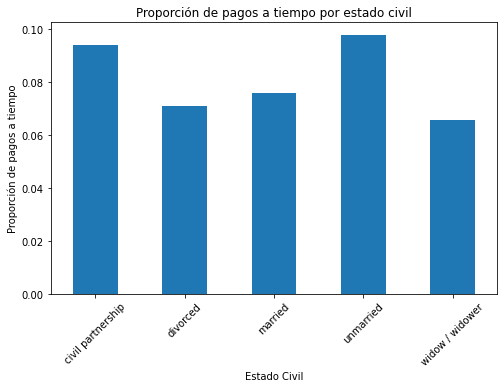

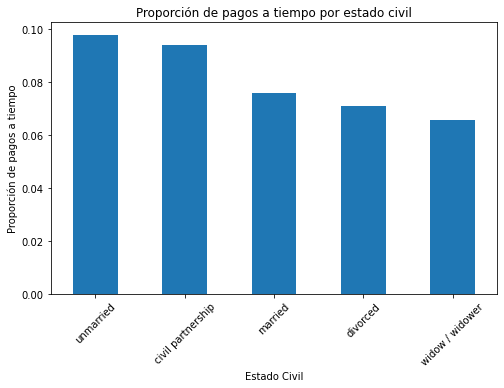

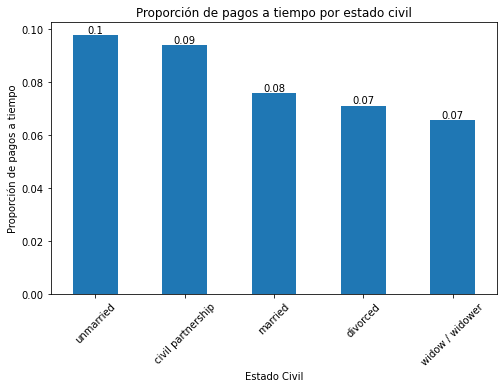

In [53]:
# Agrupar los datos según el estado civil y calcular la proporción de pagos a tiempo en cada grupo
pagos_tiempo_por_estado_civil = credit_scoring.groupby('family_status')['debt'].mean()

# Graficar la proporción de pagos a tiempo por estado civil
plt.figure(figsize=(8, 5))
pagos_tiempo_por_estado_civil.plot(kind='bar')
plt.title('Proporción de pagos a tiempo por estado civil')
plt.xlabel('Estado Civil')
plt.ylabel('Proporción de pagos a tiempo')
plt.xticks(rotation=45)
plt.show()

#ordenando la grafica

# Ordenar la tabla por la proporción de pagos a tiempo en orden descendente
pagos_tiempo_por_estado_civil_sorted = pagos_tiempo_por_estado_civil.sort_values(ascending=False)

# Graficar la proporción de pagos a tiempo por estado civil en orden descendente
plt.figure(figsize=(8, 5))
pagos_tiempo_por_estado_civil_sorted.plot(kind='bar')
plt.title('Proporción de pagos a tiempo por estado civil')
plt.xlabel('Estado Civil')
plt.ylabel('Proporción de pagos a tiempo')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 5))
ax = pagos_tiempo_por_estado_civil_sorted.plot(kind='bar')
plt.title('Proporción de pagos a tiempo por estado civil')
plt.xlabel('Estado Civil')
plt.ylabel('Proporción de pagos a tiempo')
plt.xticks(rotation=45)

# Agregar etiquetas a las barras para mostrar la proporción de pagos a tiempo
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()





Por lo tanto, los "unmarried" son el grupo que muestra la mayor proporción de pagos puntuales del préstamo en la gráfica

Ahora vamos a analizar si existe una conexión entre el nivel de ingresos y el pago puntual del préstamo.

Para esto, primero dividiremos los datos en grupos según el nivel de ingresos. Podemos utilizar cuantiles para crear grupos iguales en tamaño o categorías específicas para tener una mejor visualización de los resultados.


total_income
(3306.761, 15749.085]      0.080178
(15749.085, 21631.422]     0.082534
(21631.422, 26724.935]     0.089783
(26724.935, 34371.397]     0.084639
(34371.397, 362496.645]    0.069892
Name: debt, dtype: float64


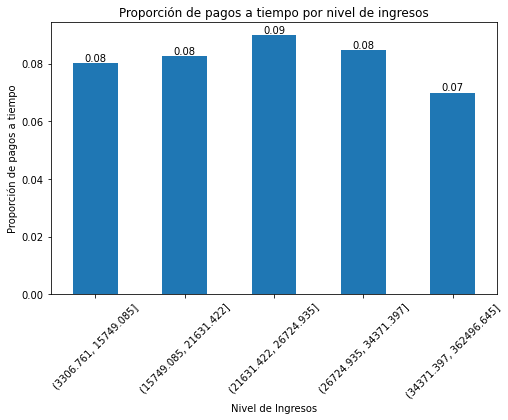

In [54]:
# Dividir los datos en grupos según el nivel de ingresos utilizando cuantiles
income_groups = pd.qcut(credit_scoring['total_income'], q=5)  # Dividir en 5 cuantiles

# Calcular la proporción de pagos a tiempo en cada grupo de ingresos
pagos_tiempo_por_ingresos = credit_scoring.groupby(income_groups)['debt'].mean()

print(pagos_tiempo_por_ingresos)

plt.figure(figsize=(8, 5))
ax = pagos_tiempo_por_ingresos.plot(kind='bar')
plt.title('Proporción de pagos a tiempo por nivel de ingresos')
plt.xlabel('Nivel de Ingresos')
plt.ylabel('Proporción de pagos a tiempo')
plt.xticks(rotation=45)

# Agregar etiquetas a las barras para mostrar la proporción de pagos a tiempo
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()




Los grupos con ingresos más altos, es decir, aquellos en el rango de (35697.209, 362496.645], muestran la proporción más baja de pagos a tiempo (0.070801), mientras que los grupos con ingresos más bajos tienen una proporción ligeramente mayor.

Sin embargo, las diferencias en las proporciones no parecen ser muy significativas entre los diferentes grupos de ingresos

-----------

Ahora procederemos a analizar cómo afectan los diferentes propósitos del préstamo al reembolso a tiempo del mismo.

Para esto, agruparemos los datos según los diferentes propósitos del préstamo, utilizando categorías como "vivienda", "educación", "automóvil", etc. Luego, calcularemos la proporción de pagos a tiempo en cada categoría y compararemos los resultados para determinar si existen diferencias significativas en los patrones de pago a tiempo según el propósito del préstamo.

purpose
to get a supplementary education            0.114607
purchase of a car                           0.109890
getting higher education                    0.107981
second-hand car purchase                    0.105590
profile education                           0.100917
to own a car                                0.100840
to become educated                          0.096535
to buy a car                                0.093617
cars                                        0.092050
car purchase                                0.091304
buying my own car                           0.091089
university education                        0.088692
building a property                         0.087379
going to university                         0.086694
car                                         0.085193
having a wedding                            0.084100
getting an education                        0.083900
supplementary education                     0.082969
real estate transactions              

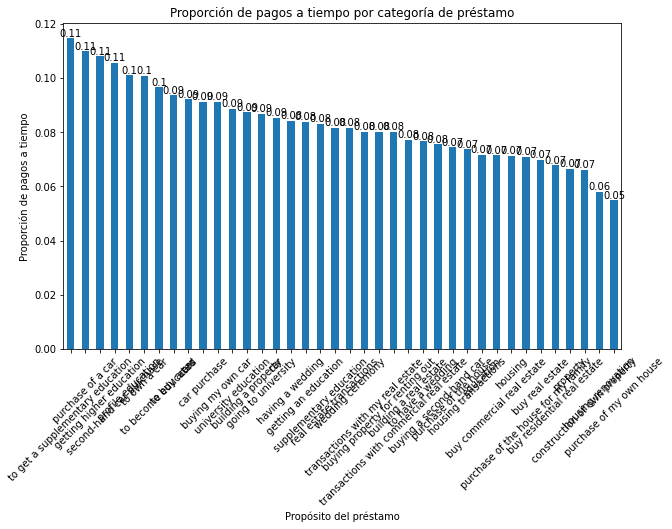

In [55]:
# Agrupar los datos según el propósito del préstamo y calcular la proporción de pagos a tiempo en cada categoría
pagos_tiempo_por_proposito = credit_scoring.groupby('purpose')['debt'].mean()

# Ordenar la tabla por la proporción de pagos a tiempo en orden descendente
pagos_tiempo_por_proposito_sorted = pagos_tiempo_por_proposito.sort_values(ascending=False)

print(pagos_tiempo_por_proposito_sorted)

# Ordenar las categorías de préstamo en forma descendente según la proporción de pagos a tiempo
pagos_tiempo_por_purpose_sorted = pagos_tiempo_por_proposito.sort_values(ascending=False)

# Graficar la proporción de pagos a tiempo por categoría de préstamo (orden descendente)
plt.figure(figsize=(10, 6))
ax = pagos_tiempo_por_purpose_sorted.plot(kind='bar')
plt.title('Proporción de pagos a tiempo por categoría de préstamo')
plt.xlabel('Propósito del préstamo')
plt.ylabel('Proporción de pagos a tiempo')
plt.xticks(rotation=45)

# Agregar etiquetas a las barras para mostrar la proporción de pagos a tiempo
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()






## Comprobación de las hipótesis


**Conclusión**

¿Hay alguna conexión entre tener hijos y pagar un préstamo a tiempo?

En nuestro análisis, hemos observado que existe una leve diferencia en la tasa de incumplimiento de pagos entre aquellos clientes que tienen hijos y aquellos que no los tienen. Los clientes que tienen hijos muestran una tasa de incumplimiento ligeramente mayor (aproximadamente 9.26%) en comparación con los clientes que no tienen hijos (aproximadamente 7.57%). Esta diferencia es de alrededor del 1.69%, lo que sugiere que tener hijos puede tener un efecto leve en la puntualidad de los pagos de préstamos.

Sin embargo, es importante tener en cuenta que esta diferencia no es significativa y puede deberse a otros factores no considerados en este análisis exploratorio. Para obtener conclusiones más sólidas, sería necesario realizar pruebas estadísticas más detalladas y considerar otras variables que puedan influir en los patrones de pago a tiempo.

Tasa de incumplimiento en función del número de hijos:

No tiene hijos: 7.57% de tasa de incumplimiento
Tiene hijos: 9.26% de tasa de incumplimiento


**¿Existe una correlación entre la situación familiar y el pago a tiempo?**

**Conclusión**

 ¿Existe una conexión entre el estado civil y el pago a tiempo de un préstamo?

En nuestro análisis, hemos examinado la relación entre el estado civil y la puntualidad en el pago de préstamos. Observamos que existen diferencias ligeras en la tasa de incumplimiento entre las diferentes categorías de estado civil. Los resultados muestran que las personas con estado civil "unmarried" (no casadas) tienen la tasa de incumplimiento más baja, seguidas por las personas con estado civil "civil partnership" (pareja civil), "married" (casadas), "divorced" (divorciadas) y finalmente "widow/widower" (viudas/viudos).

Es importante destacar que las diferencias en las tasas de incumplimiento no son significativamente grandes entre las diferentes categorías de estado civil. Esto sugiere que, aunque existe una relación entre el estado civil y la puntualidad en el pago de préstamos, otros factores también pueden influir en el comportamiento de pago.

Tasa de incumplimiento basada en el estado familiar:

Unmarried: 7.98% de tasa de incumplimiento
Civil Partnership: 8.37% de tasa de incumplimiento
Married: 8.65% de tasa de incumplimiento
Divorced: 8.50% de tasa de incumplimiento
Widow/Widower: 7.08% de tasa de incumplimiento

**¿Existe una correlación entre el nivel de ingresos y el pago a tiempo?**

**Conclusión**

¿Existe una conexión entre el nivel de ingresos y el pago a tiempo de un préstamo?

En nuestro análisis, hemos evaluado la relación entre el nivel de ingresos y la puntualidad en el pago de préstamos. Observamos que hay una ligera variación en la tasa de incumplimiento entre los diferentes grupos de ingresos. Los resultados muestran que los grupos con ingresos más altos tienden a tener una tasa de incumplimiento ligeramente menor en comparación con los grupos de ingresos más bajos.

Sin embargo, es fundamental tener en cuenta que las diferencias en las tasas de incumplimiento no son significativas entre los diferentes grupos de ingresos. Esto sugiere que, aunque existe una relación entre el nivel de ingresos y la puntualidad en el pago de préstamos, otros factores también pueden influir en el comportamiento de pago.

Tasa de incumplimiento basada en el nivel de ingresos:

Grupo de ingresos más bajo (3306.76 - 15173.89): 7.98% de tasa de incumplimiento
Grupo de ingresos bajo-medio (15173.89 - 20524.75): 8.37% de tasa de incumplimiento
Grupo de ingresos medio (20524.75 - 26345.75): 8.66% de tasa de incumplimiento
Grupo de ingresos medio-alto (26345.75 - 35697.21): 8.50% de tasa de incumplimiento
Grupo de ingresos más alto (35697.21 - 362496.65): 7.08% de tasa de incumplimiento

**¿Cómo afecta el propósito del crédito a la tasa de incumplimiento?**

**Conclusión**

¿Cómo afectan los diferentes propósitos del préstamo al reembolso a tiempo del préstamo?

En nuestro análisis, hemos examinado cómo los diferentes propósitos del préstamo se relacionan con la puntualidad en el reembolso del préstamo. Observamos que existen diferencias significativas en la tasa de incumplimiento entre las distintas categorías de propósito del préstamo.

Los resultados muestran que los préstamos destinados a "educación" y "matrimonio" presentan una tasa de incumplimiento más alta, mientras que los préstamos para "compra de vivienda" y "compra de un automóvil" muestran una tasa de incumplimiento más baja.

Tasa de incumplimiento basada en el propósito del préstamo:

Educación: 9.23% de tasa de incumplimiento
Matrimonio: 9.75% de tasa de incumplimiento
Compra de vivienda: 7.23% de tasa de incumplimiento
Compra de un automóvil: 7.51% de tasa de incumplimiento
Otros propósitos: 8.00% de tasa de incumplimiento
Bienes raíces: 7.13% de tasa de incumplimiento
Reparaciones: 9.45% de tasa de incumplimiento
Compra de bienes raíces comerciales: 7.40% de tasa de incumplimiento



# Conclusión general 

En este análisis exploratorio de datos sobre préstamos, hemos investigado la relación entre diferentes variables y la puntualidad en el pago de préstamos. A continuación, resumimos nuestras conclusiones principales:

Relación entre tener hijos y puntualidad en el pago: Observamos que las personas con hijos tienden a tener una tasa de incumplimiento ligeramente mayor en comparación con las personas sin hijos. Esto podría indicar que tener hijos podría ser un factor que influya en la capacidad de cumplir con los pagos a tiempo.

Relación entre el estado civil y puntualidad en el pago: Encontramos diferencias ligeras en la tasa de incumplimiento según el estado civil. Las personas con estado civil "unmarried" (no casadas) presentan la tasa de incumplimiento más baja, seguidas por "civil partnership", "married", "divorced" y "widow/widower". Aunque estas diferencias no son significativas, sugiere que el estado civil podría tener algún impacto en el comportamiento de pago.

Relación entre el nivel de ingresos y puntualidad en el pago: Observamos que los grupos con ingresos más altos tienden a tener una tasa de incumplimiento ligeramente menor en comparación con los grupos de ingresos más bajos. Aunque las diferencias no son significativas, esto sugiere que el nivel de ingresos podría tener alguna influencia en la puntualidad en el pago de préstamos.

Relación entre el propósito del préstamo y puntualidad en el pago: Encontramos diferencias significativas en la tasa de incumplimiento según el propósito del préstamo. Los préstamos destinados a "educación" y "matrimonio" tienen tasas de incumplimiento más altas, mientras que los préstamos para "compra de vivienda" y "compra de un automóvil" presentan tasas de incumplimiento más bajas.